# alpha pose implementation

In [1]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_alpha_pose, heatmap_to_coord_alpha_pose
import mxnet as mx
%matplotlib inline

detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('alpha_pose_resnet101_v1b_coco', pretrained=True)

# Note that we can reset the classes of the detector to only include
# human, so that the NMS process is faster.

detector.reset_class(["person"], reuse_weights=['person'])

C:\Users\ratan\anaconda3\installation\envs\glu\lib\site-packages\gluoncv\__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.6.0+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [43]:
pose_net.summary(mx.nd.ones((1, 3, 256, 192)))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                            (1, 3, 256, 192)               0
            Conv2D-1                            (1, 64, 128, 96)            9408
         BatchNorm-2                            (1, 64, 128, 96)             256
        Activation-3                            (1, 64, 128, 96)               0
         MaxPool2D-4                             (1, 64, 64, 48)               0
            Conv2D-5                             (1, 64, 64, 48)            4096
         BatchNorm-6                             (1, 64, 64, 48)             256
            Conv2D-7                             (1, 64, 64, 48)           36864
         BatchNorm-8                             (1, 64, 64, 48)             256
            Conv2D-9                            (1, 256, 64, 48)           16384
        BatchNorm-10        

# predicting single image

Shape of pre-processed image: (1, 3, 701, 512)


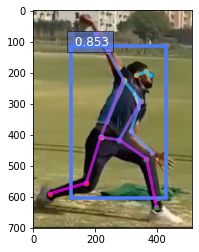

In [2]:
x, img = data.transforms.presets.yolo.load_test('pose1.jpg', short=512)
print('Shape of pre-processed image:', x.shape)

class_IDs, scores, bounding_boxs = detector(x)

pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)

predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)

ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)
a=utils.viz.cv_plot_keypoints(img, pred_coords, confidence,
                                      class_IDs, bounding_boxs, scores,
                                      box_thresh=0.2, keypoint_thresh=0.2)
plt.show()

# predicting frames

In [13]:
import os
input_folder='frames'                    #change name of input folder here
filenames = [f.path for f in os.scandir(input_folder) if f.is_file() and f.path.endswith(('.png', '.jpg'))] #change in input folder
output_folder='pred_'+input_folder
if not os.path.exists(output_folder):
    os.makedirs(args.output_dir)

In [12]:
for i in range(len(filenames)):
    x, img = data.transforms.presets.ssd.load_test(filenames[i], short=512)
    print('Shape of pre-processed image:', x.shape)

    class_IDs, scores, bounding_boxs = detector(x)

    pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)

    predicted_heatmap = pose_net(pose_input)
    pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)

    a = utils.viz.cv_plot_keypoints(img, pred_coords, confidence,
                                  class_IDs, bounding_boxs, scores,
                                  box_thresh=0.5, keypoint_thresh=0.2)
    path=output_folder+'\\'+filenames[i].split('\\')[1]                  #changing output folder
    plt.imsave(path,a)
    

Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-

ValueError: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.


##### The above code breaks as detector_to_alpha_pose returns null values for score less than 0.5
# handling null returns
### The following code saves the image frames which we have read previously

In [25]:
for i in range(len(filenames)):
    x, img = data.transforms.presets.ssd.load_test(filenames[i], short=512)
    print('Shape of pre-processed image:', x.shape)

    class_IDs, scores, bounding_boxs = detector(x)

    pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs,output_shape=(256, 192), ctx=mx.cpu(),
                           thr=0.2)
    try:
        predicted_heatmap = pose_net(pose_input)
        pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)

        a = utils.viz.cv_plot_keypoints(img, pred_coords, confidence,
                                      class_IDs, bounding_boxs, scores,
                                      box_thresh=0.2, keypoint_thresh=0.2)
    except:
        a=img
    path=output_folder+'\\'+filenames[i].split('\\')[1]                  #changing output folder
    plt.imsave(path,a)

Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-processed image: (1, 3, 512, 910)
Shape of pre-

# finding angle bw joints

In [26]:
import math
 
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang
 
#print(getAngle((5, 0), (0, 0), (0, 5))

In [27]:
d=data.mscoco.keypoints.COCOKeyPoints.KEYPOINTS

In [29]:
d

{0: 'nose',
 1: 'left_eye',
 2: 'right_eye',
 3: 'left_ear',
 4: 'right_ear',
 5: 'left_shoulder',
 6: 'right_shoulder',
 7: 'left_elbow',
 8: 'right_elbow',
 9: 'left_wrist',
 10: 'right_wrist',
 11: 'left_hip',
 12: 'right_hip',
 13: 'left_knee',
 14: 'right_knee',
 15: 'left_ankle',
 16: 'right_ankle'}

In [67]:
pred_coords


[[[378.88672  209.4414  ]
  [374.26953  200.20703 ]
  [365.03516  195.58984 ]
  [351.1836   218.67578 ]
  [332.71484  209.4414  ]
  [346.5664   292.55078 ]
  [291.16016  223.29297 ]
  [314.2461   389.51172 ]
  [240.3711   130.94922 ]
  [383.5039   458.76953 ]
  [201.125     73.234375]
  [277.3086   417.21484 ]
  [217.28516  407.98047 ]
  [365.03516  477.23828 ]
  [171.11328  555.73047 ]
  [397.35547  634.22266 ]
  [ 53.375    590.3594  ]]]
<NDArray 1x17x2 @cpu(0)>

In [55]:
pred=pred_coords[0].asnumpy()

In [64]:
print('angle bw right_hip,knee,ankle:',getAngle(pred[11],pred[13],pred[15]))

angle bw right_hip,knee,ankle: 223.9860212772147


In [65]:
print('angle bw left_hip,knee,ankle:',getAngle(pred[12],pred[14],pred[16]))

angle bw left_hip,knee,ankle: 236.25643502970394


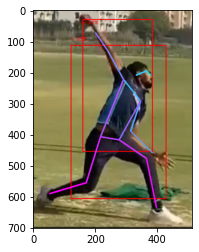

In [68]:
plt.imshow(a)